<h1>Sentiment Analysis on Feedback Data</h1>

In [ ]:
import pandas as pd
import numpy as np

<h2>Loading the data set</h2>

In [ ]:
df = pd.read_csv("/content/student_feedback_dataset.csv")

In [ ]:
df.head()

,student_id,student_review,rating_out_of_10
0,S001,It's neither bad nor great.,5
1,S002,The teachers are highly supportive.,9
2,S003,I really enjoy the teaching style.,10
3,S004,The teacher does not explain properly.,3
4,S005,They should include extra classes.,4


In [ ]:
df.size

600

<h2>Using TextBlob to know whether a review is positive or negative</h2>

In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # -1 (negative) to 1 (positive)

    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

<h1>Increase in number of classes can be productive</h1>
<h3> This is a suggestion but our library count it as a positive or neutral review while suggestion should be negative so we will check on few key words to know whether it is a suggestion or not<h3>

In [ ]:
def enhanced_sentiment(text):
    base_sentiment = analyze_sentiment(text)

    # Keywords that imply improvement or dissatisfaction
    negative_keywords = ['should', 'need', 'must', 'lack', 'missing', 'improve', 'better', 'extra', 'more', 'not enough' , 'should' , 'does' , 'understand']

    if any(word in text.lower() for word in negative_keywords):
        return "Negative"

    return base_sentiment

In [ ]:
    # defining the list that will store the reviews
    neg = []
    pos = []
    neu = []

<h2> The function counts as well as add reviews to there seprate list deefined above</h2>

In [ ]:
def count():
    for i in df["student_review"]:
        result = enhanced_sentiment(i)  # Use the current review

        if result == "Positive":
            pos.append(i)
        elif result == "Negative":
            neg.append(i)
        else:
            neu.append(i)

    print("The number of positive reviews are: " + str(len(pos)))
    print("The number of negative reviews are: " + str(len(neg)))
    print("The number of neutral reviews are:  " + str(len(neu)))


In [ ]:
count()

The number of positive reviews are: 134
The number of negative reviews are: 66
The number of neutral reviews are:  0


In [ ]:
# It prints all the positive review
def positiveReview():
  print("There are " + str(len(pos)) + " positive reviews")
  for i in pos:
    print(i)


In [ ]:
# It prints all the negative review
def negativeReview():
  print("There are " + str(len(neg)) + " negative reviews")
  for i in neg:
    print(i)


In [ ]:
# It prints all the neutral review
def neutralReview():
    print("There are " + str(len(neu)) + " neutral reviews")
    for i in neu:
        print(i)


In [ ]:
neutralReview()

There are 0 neutral reviews


In [ ]:
negativeReview()

There are 66 negative reviews
The teacher does not explain properly.
They should include extra classes.
The teacher does not explain properly.
The teacher does not explain properly.
The teacher does not explain properly.
The teacher does not explain properly.
The teacher does not explain properly.
Average experience so far.
Class timing should be improved.
The teacher does not explain properly.
The teacher does not explain properly.
I don't understand most of the topics.
The teacher does not explain properly.
I don't understand most of the topics.
They should include extra classes.
I don't understand most of the topics.
They should include extra classes.
They should include extra classes.
Average experience so far.
They should include extra classes.
The teacher does not explain properly.
Class timing should be improved.
The teacher does not explain properly.
The teacher does not explain properly.
I don't understand most of the topics.
The teacher does not explain properly.
I don't unde

In [ ]:
positiveReview()

There are 134 positive reviews
It's neither bad nor great.
The teachers are highly supportive.
I really enjoy the teaching style.
I really enjoy the teaching style.
The course material is very useful.
The lecture pace is too fast.
The lecture pace is too fast.
The environment is decent.
The environment is decent.
The course material is very useful.
Everything is going smoothly in the classes.
Everything is going smoothly in the classes.
The lecture pace is too fast.
I really enjoy the teaching style.
The classes are very helpful and well-structured.
The course material is very useful.
Everything is going smoothly in the classes.
The teachers are highly supportive.
The teachers are highly supportive.
The course is okay.
The lecture pace is too fast.
The course material is very useful.
The teachers are highly supportive.
The lecture pace is too fast.
The environment is decent.
The classes are very helpful and well-structured.
The course material is very useful.
The course material is ver

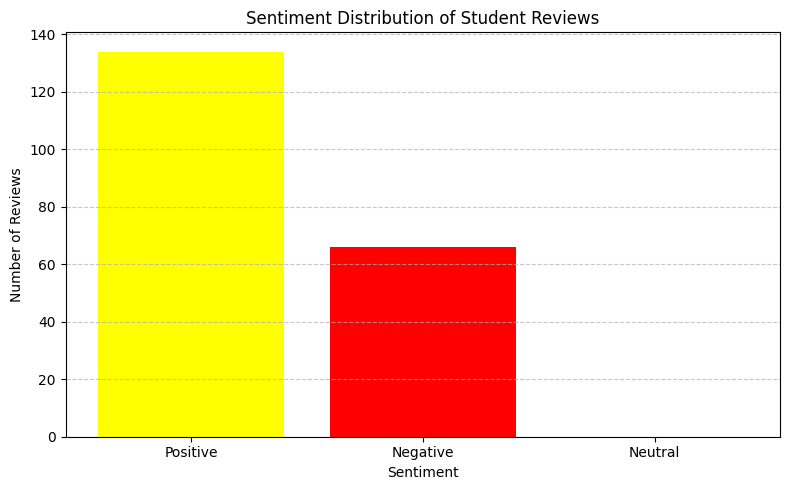

In [ ]:
import matplotlib.pyplot as plt

# Bar chart using lengths of the pos, neg, and neu lists
sentiment_counts = {
    "Positive": len(pos),
    "Negative": len(neg),
    "Neutral": len(neu)
}

plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['yellow', 'red', 'gray'])
plt.title("Sentiment Distribution of Student Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

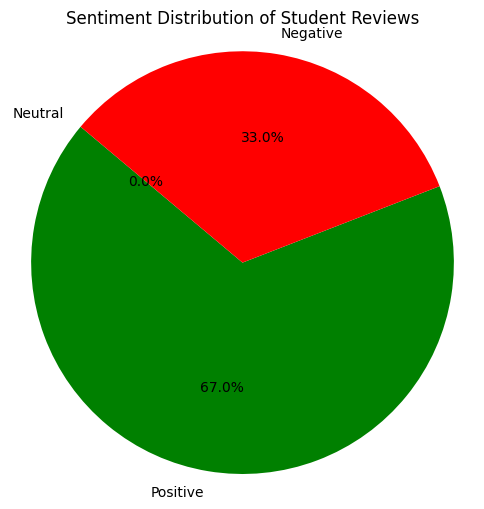

In [ ]:

# Prepare sentiment data
labels = ['Positive', 'Negative', 'Neutral']
sizes = [len(pos), len(neg), len(neu)]
colors = ['green', 'red', 'gray']

# it will Draw pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution of Student Reviews")
plt.axis('equal')  # Makes the pie chart a circle
plt.show()

In [ ]:
# By usiing mean tells the average rating of the course
avg = df["rating_out_of_10"].mean()
print(f"The average rating of the course out of 10 is {avg}")


The average rating of the course out of 10 is 5.565


<h2> It tells count frequency of the rating <h2>

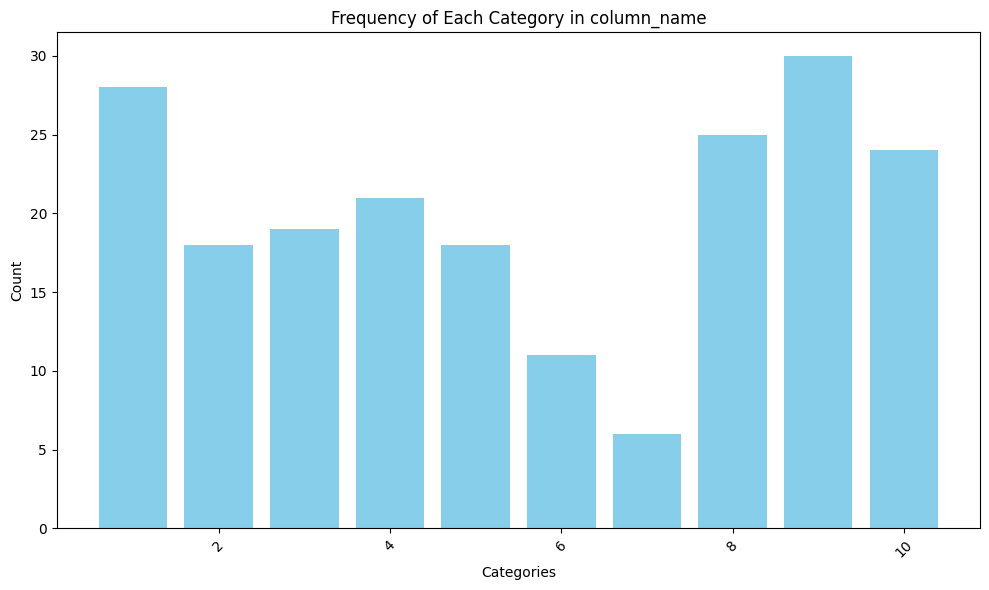

In [ ]:
# Count occurrences of each category
value_counts = df['rating_out_of_10'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Frequency of Each Category in column_name')
plt.xticks(rotation=45)  # Rotate x-labels if too long
plt.tight_layout()
plt.show()